Europe Population in 2000 is 714 million.
Europe Population in 2010 is 706 million.
Population Growth in Europe between 2000-2010 is -8 million.
Top 5 European Countries with the Highest Population Growth (2000-2010)
+----------------+-----------------------------+
|    Country     | Population Growth (Million) |
+----------------+-----------------------------+
|     Spain      |              6              |
|     France     |              4              |
| United Kingdom |              3              |
|    Ireland     |              1              |
|     Italy      |              1              |
+----------------+-----------------------------+


(array([1998., 2000., 2002., 2004., 2006., 2008., 2010., 2012.]),
 [Text(1998.0, 0, '1998'),
  Text(2000.0, 0, '2000'),
  Text(2002.0, 0, '2002'),
  Text(2004.0, 0, '2004'),
  Text(2006.0, 0, '2006'),
  Text(2008.0, 0, '2008'),
  Text(2010.0, 0, '2010'),
  Text(2012.0, 0, '2012')])

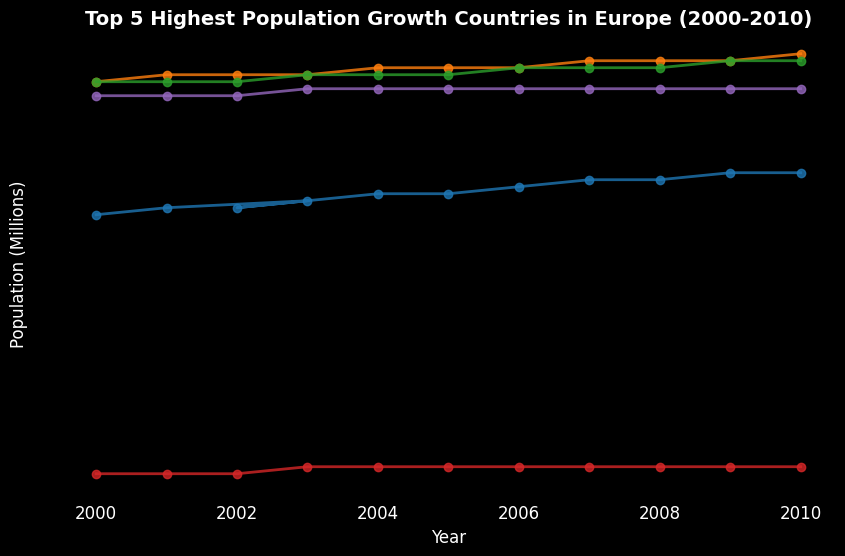

In [ ]:
import pandas as pd

#Open the CSV file
df = pd.read_csv("/Users/Michelle Wong/Desktop/population.csv")

# For calculate the total population growth in Europe between 2000 and 2010.
# Filter data for the years 2000 and 2010 for Europe
europe_data_2000 = df[(df['year'] == 2000) & (df['continent'] == 'Europe')]
europe_data_2010 = df[(df['year'] == 2010) & (df['continent'] == 'Europe')]
 
# Calculate the total population for 2000 and 2010
total_population_2000 = int(europe_data_2000['population'].sum())
total_population_2010 = int(europe_data_2010['population'].sum())
 
# Calculate the population growth
population_growth = total_population_2010 - total_population_2000
 
# Output the result
print("Europe Population in 2000 is " + str(total_population_2000) + " million.")
print("Europe Population in 2010 is " + str(total_population_2010) + " million.")
print("Population Growth in Europe between 2000-2010 is " + str(population_growth) + " million.")

#Identify the top 5 European countries by population growth during this period
from tabulate import tabulate

# Filter data for the years 2000 and 2010 for Europe
europe_data_2000 = df[(df['year'] == 2000) & (df['continent'] == 'Europe')]
europe_data_2010 = df[(df['year'] == 2010) & (df['continent'] == 'Europe')]

# Ensure both dataframes are indexed by country names so that they align correctly
europe_data_2000.set_index('country name', inplace=True)
europe_data_2010.set_index('country name', inplace=True)

# Get the population data for both years
population_2000 = europe_data_2000['population']
population_2010 = europe_data_2010['population']

# Calculate the population growth by subtracting population in 2000 from population in 2010
growth = population_2010 - population_2000

# Create a DataFrame with the country names and their corresponding growth
growth_data = pd.DataFrame({
    'country': growth.index, 
    'growth': growth.values
})

# Get the top 5 countries with the highest population growth using nlargest
top_5_growth = growth_data.nlargest(5, 'growth')

# Convert the growth values to integers (removes decimal places)
top_5_growth['growth'] = top_5_growth['growth'].astype(int)

# Display the top 5 countries with the highest population growth
print("Top 5 European Countries with the Highest Population Growth (2000-2010)") 
print(tabulate(top_5_growth[['country', 'growth']], headers=["Country", "Population Growth (Million)"], tablefmt='pretty', showindex=False))


# Create a line plot showing the population changes of these countries from 2000 to 2010
import matplotlib.pyplot as plt

# Filter data for the years between 2000 and 2010 for Europe
europe_data = df[(df['year'] >= 2000) & (df['year'] <= 2010) & (df['continent'] == 'Europe')]

# Get the top 5 countries by population growth from 2000 to 2010
# (Assuming the previous steps to find top_5_countries are already done)
top_5_countries = ['Spain', 'France', 'United Kingdom', 'Ireland', 'Italy']

# Filter the data for top 5 countries
top_5_data = europe_data[europe_data['country name'].isin(top_5_countries)]

# Create a plot for the population changes between 2000 and 2010
plt.figure(figsize=(10, 6))

# Set the background color of the plot to black
plt.gcf().set_facecolor('black')
plt.gca().set_facecolor('black')  # Set the axes background to black

# Plot the line for each country
for country in top_5_countries:
    country_data = top_5_data[top_5_data['country name'] == country]
    plt.plot(country_data['year'], country_data['population'], marker='o', label=country,
             linewidth=2, alpha=0.8)

# Add title and labels
plt.title('Top 5 Highest Population Growth Countries in Europe (2000-2010)', fontsize=14, color='white', weight='bold')
plt.xlabel('Year', fontsize=12, color='white')
plt.ylabel('Population (Millions)', fontsize=12, color='white')

# Change the tick labels color to white for better visibility on the dark background
plt.xticks(color='white', fontsize=12)
